In [ ]:
!pip install dash
import pandas as pd
import plotly.express as px
import dash
import csv
import matplotlib.pyplot as plt
from dash import dcc, html
from dash.dependencies import Input, Output

# Load the dataset
df = pd.read_csv("./dataset/Taylor_Swift_albumsales.csv")

# Create a Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    dcc.Graph(id='world-heatmap', style={'height': '80vh'}),  # Set the height to 80% of the viewport height
    html.Div([
        html.Label('Select Year:'),
        dcc.Slider(
            id='year-slider',
            min=df['Year'].min(),
            max=df['Year'].max(),
            value=df['Year'].min(),
            marks={str(year): str(year) for year in df['Year'].unique()},
            step=None
        )
    ])
])

# Define callback to update the heatmap based on the selected year
@app.callback(
    Output('world-heatmap', 'figure'),
    [Input('year-slider', 'value')]
)
def update_heatmap(year):
    filtered_df = df[(df['Year'] == year) & (df['Sales'] > 0)]  # Filter out negative sales values
    fig = px.choropleth(
        filtered_df,
        locations='Country',
        locationmode='country names',
        color='Sales',
        hover_name='Country',
        color_continuous_scale='Viridis',
        color_continuous_midpoint=filtered_df['Sales'].mean(),  # Set midpoint to the mean of positive sales values
        title=f'Sales of the albums Worldwide in Year {year}'
    )
    fig.update_geos(projection_type="equirectangular")
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

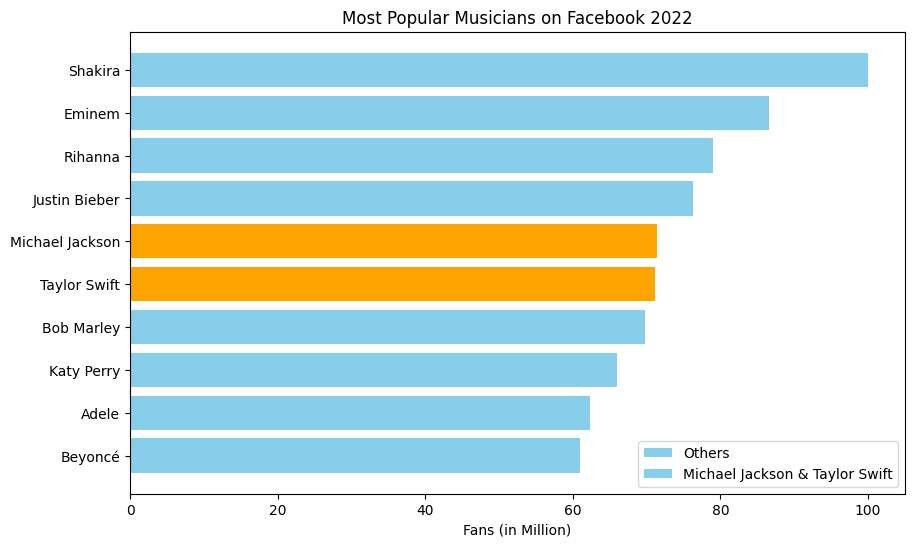

In [10]:
# Path to the CSV file
csv_file = "./dataset/Most Popular.csv"

# Lists to store musician names and fans
musicians = []
fans_in_million = []

# Read data from the CSV file
with open(csv_file, 'r', newline='') as file:
    reader = csv.DictReader(file)
    for row in reader:
        musicians.append(row['\ufeffMost popular musicians on Facebook'])
        fans_in_million.append(float(row['Fans(in Million)']))

# Define colors for each musician
colors = ['skyblue' if musician not in ['Michael Jackson', 'Taylor Swift'] else 'orange'
          for musician in musicians]

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.barh(musicians, fans_in_million, color=colors)
plt.xlabel('Fans (in Million)')
plt.title('Most Popular Musicians on Facebook 2022')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest number of fans at the top

# Add legend for custom colors
plt.legend(handles=[bars[0], bars[1]], labels=['Others', 'Michael Jackson & Taylor Swift'], loc='lower right')

plt.show()


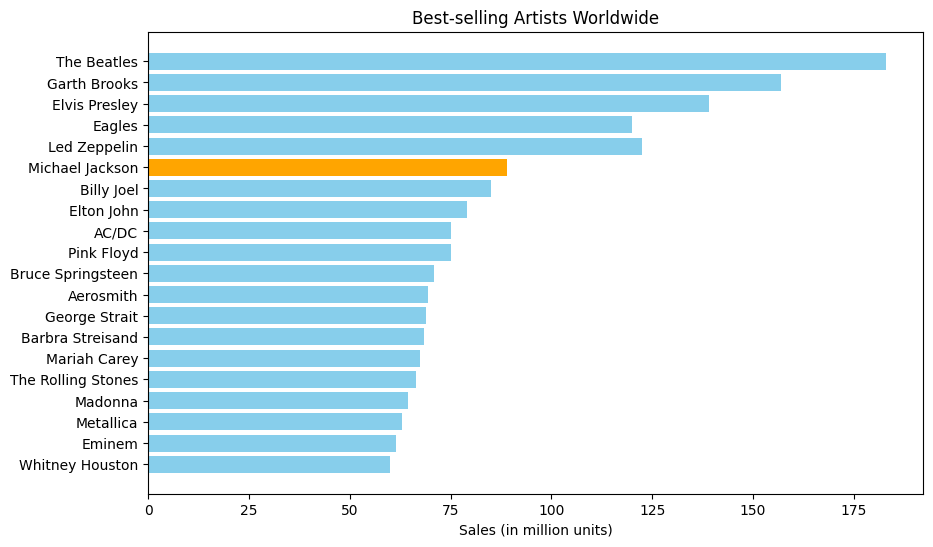

In [16]:

# Path to the CSV file
csv_file = "./dataset/Best Selling Artist Worldwide.csv"

# Lists to store artist names and sales
artists = []
sales_in_million = []

# Read data from the CSV file
with open(csv_file, 'r', newline='') as file:
    reader = csv.DictReader(file)
    for row in reader:
        artists.append(row['\ufeffBest-selling artists worldwide'])
        sales_in_million.append(float(row['Sales(in million units)']))

# Define colors for each artist
colors = ['skyblue' if artist != 'Michael Jackson' else 'orange' for artist in artists]

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.barh(artists, sales_in_million, color=colors)
plt.xlabel('Sales (in million units)')
plt.title('Best-selling Artists Worldwide')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest sales at the top

plt.show()

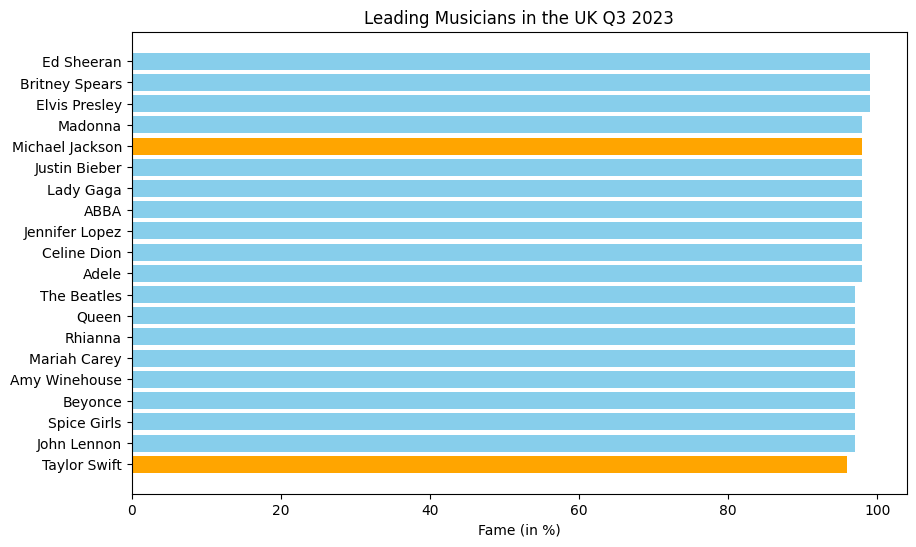

In [26]:


# Path to the CSV file
csv_file = "./dataset/Leading Musicians in UK by fame.csv"

# Lists to store musician names and fame percentages
musicians = []
fame_percentages = []

# Read data from the CSV file
with open(csv_file, 'r', newline='') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row
    for row in reader:
        musicians.append(row[0])
        fame_percentages.append(float(row[1]))

# Define colors for each musician
colors = ['skyblue' if musician not in ['Michael Jackson', 'Taylor Swift'] else 'orange'
          for musician in musicians]

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.barh(musicians, fame_percentages, color=colors)
plt.xlabel('Fame (in %)')
plt.title('Leading Musicians in the UK Q3 2023')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest fame at the top


plt.show()


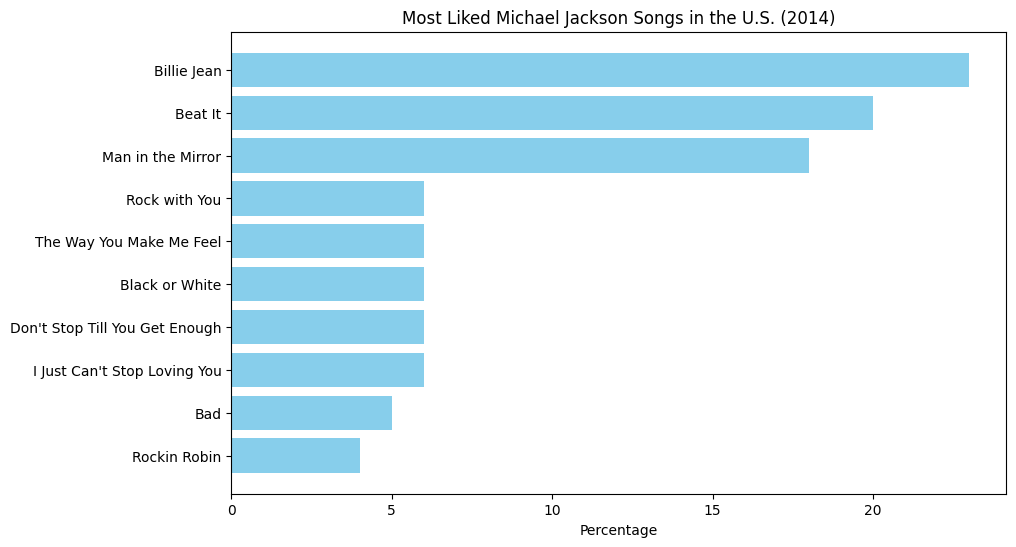

In [35]:

# Path to the CSV file
csv_file = "./dataset/Michael Jackson Most Liked Songs.csv"

# Lists to store song names and percentages
songs = []
percentages = []

# Read data from the CSV file
with open(csv_file, 'r', newline='',encoding='latin1') as file:
    reader = csv.DictReader(file)
    for row in reader:
        songs.append(row['Most liked Michael Jackson song in the U.S. 2014'])
        percentages.append(int(row['Percentage']))

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(songs, percentages, color='skyblue')
plt.xlabel('Percentage')
plt.title('Most Liked Michael Jackson Songs in the U.S. (2014)')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest percentage at the top
plt.show()
